In [1]:
import math
import numpy as np
import pandas as pd

import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import time

timer_array = {}

def start_timer(method_name):
  timer_array[method_name] = time.time()

def end_timer(method_name):
  passed = (time.time() - timer_array[method_name])
  print(""+method_name+" time: %s seconds \n" % passed)
  return passed

In [3]:
path_base = '/content/drive/My Drive/Colab Notebooks/Project 8/'

In [4]:
tweets_raw = pd.read_csv(path_base + 'Tweets.csv')

In [5]:
tweets_raw.shape

(14640, 15)

In [6]:
tweets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
tweets_raw.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [8]:
tweets_raw.isnull().sum().sort_values(ascending = False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

In [9]:
tweets_raw.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Understand of data-columns

In [10]:
tweets_text = tweets_raw[["airline_sentiment","text"]]

In [11]:
tweets_text.shape

(14640, 2)

In [12]:
tweets_text.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [13]:
tweets_text.airline_sentiment.iloc[tweets_text.airline_sentiment == "negative"] = -1
tweets_text.airline_sentiment.iloc[tweets_text.airline_sentiment == "neutral"] = 0
tweets_text.airline_sentiment.iloc[tweets_text.airline_sentiment == "positive"] = 1

In [14]:
tweets_text.airline_sentiment = tweets_text.airline_sentiment.astype('int32')
tweets_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  int32 
 1   text               14640 non-null  object
dtypes: int32(1), object(1)
memory usage: 171.7+ KB


# Text pre-processing

In [15]:
#Measuring the entire pre-processing time
start_timer('pre_processing')

In [16]:
for i in np.arange(0,5):
  print(tweets_text["text"][i])

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it


<font size="5">Decoding Html, because &amp; is an encoded html character</font>

In [17]:
import html

def decode_html_column(column_values):
  start_timer('decode_html_column')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = html.unescape(column_copy[i])
  
  end_timer('decode_html_column')
  return column_copy

In [18]:
tweets_text["text"] = decode_html_column(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.text[i])

decode_html_column time: 0.16469407081604004 seconds 

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
@VirginAmerica and it's a really big bad thing about it


<font size="5">To Lowercase</font>

In [19]:
tweets_text["text"] = tweets_text["text"].str.lower()

for i in np.arange(0,5):
  print(tweets_text.text[i])

@virginamerica what @dhepburn said.
@virginamerica plus you've added commercials to the experience... tacky.
@virginamerica i didn't today... must mean i need to take another trip!
@virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
@virginamerica and it's a really big bad thing about it


<font size="5">Removing html from the text</font>

In [20]:
from bs4 import BeautifulSoup

def remove_html_tags(column_values):
  start_timer('remove_html_tags')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    soup = BeautifulSoup(column_copy[i], "html.parser")
    column_copy[i] = soup.get_text()
  
  end_timer('remove_html_tags')
  return column_copy

In [21]:
tweets_text["text"] = remove_html_tags(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.text[i])

remove_html_tags time: 1.2301616668701172 seconds 

@virginamerica what @dhepburn said.
@virginamerica plus you've added commercials to the experience... tacky.
@virginamerica i didn't today... must mean i need to take another trip!
@virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
@virginamerica and it's a really big bad thing about it


<font size="5">Remove accented characters</font>

In [22]:
import unicodedata

def remove_accents(column_values):
  start_timer('remove_accents')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = unicodedata.normalize('NFKD', column_copy[i]).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  
  end_timer('remove_accents')
  return column_copy

In [23]:
tweets_text["text"] = remove_accents(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.text[i])

remove_accents time: 0.17648983001708984 seconds 

@virginamerica what @dhepburn said.
@virginamerica plus you've added commercials to the experience... tacky.
@virginamerica i didn't today... must mean i need to take another trip!
@virginamerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
@virginamerica and it's a really big bad thing about it


<font size="5">Using Regular Expressions to clear the text from numbers, special characters and punctuations.</font>

In [24]:
import re

def remove_special_characters_column(column_values, remove_digits=False):
  start_timer('remove_special_characters')

  column_copy = column_values.loc[:]
  pattern = r'[^\w\d\s]' if not remove_digits else r'[^\w\s]'

  for i in column_values.index:
    column_copy[i] = re.sub(pattern, '', column_copy[i])
  
  end_timer('remove_special_characters')
  return column_copy


def remove_special_characters_array(column_values, remove_digits=False):
  start_timer('remove_special_characters')

  column_copy = column_values
  pattern = r'[^\w\d\s]' if not remove_digits else r'[^\w\s]'

  for i, s in enumerate(column_values):
     column_copy[i] = re.sub(pattern, '', s)
  
  end_timer('remove_special_characters')
  return column_copy

In [25]:
tweets_text["text"] = remove_special_characters_column(tweets_text["text"], True)

for i in np.arange(0,5):
  print(tweets_text.text[i])

remove_special_characters time: 0.22701478004455566 seconds 

virginamerica what dhepburn said
virginamerica plus youve added commercials to the experience tacky
virginamerica i didnt today must mean i need to take another trip
virginamerica its really aggressive to blast obnoxious entertainment in your guests faces  they have little recourse
virginamerica and its a really big bad thing about it


<font size="5">Tokenization</font>

In [26]:
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer=ToktokTokenizer()

def tokenize_columns(column_values):
  start_timer('tokenize_columns')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = tokenizer.tokenize(column_copy[i])
  
  end_timer('tokenize_columns')
  return column_copy

In [27]:
tweets_text["tokens"] = tokenize_columns(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.tokens[i])

tokenize_columns time: 1.069549560546875 seconds 

['virginamerica', 'what', 'dhepburn', 'said']
['virginamerica', 'plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
['virginamerica', 'i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
['virginamerica', 'its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse']
['virginamerica', 'and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


<font size="5">Checking and clearing the company name</font>

In [28]:
#Confirming that the first position is a dispensable word
for i in np.arange(1000, 14000, 1000):
  print(tweets_text.text[i])

['united', 'how', 'can', 'you', 'not', 'put', 'my', 'bag', 'on', 'plane', 'to', 'seattle', 'flight', '1212', 'waiting', 'in', 'line', 'to', 'talk', 'to', 'someone', 'about', 'my', 'bag', 'status', 'should', 'matter']
['united', 'wifi', 'wasnt', 'working', 'onboardalerted', 'attendant', 're', 'socketyou', 'sent', 'me', 'to', 'a', 'hotel', 'for', '24', 'hours', 'with', '7', 'vouchersno', 'wifi', 'at', 'hotel']
['united', 'is', 'a', 'money', 'sucking', 'airline', 'with', 'terrible', 'terrible', 'customer', 'service']
['united', 'so', 'you', 'are', 'saying', 'that', 'customer', 'care', 'does', 'not', 'report', 'to', 'anyone', 'their', 'response', 'is', 'humiliating', 'for', 'a', 'company', 'that', 'serves', 'the', 'public']
['southwestair', 'neveryamind', 'i', 'paid', '450', 'for', 'a', 'flight', '250', 'for', 'a', 'new', 'bag', 'is', 'easy', 'for', 'business', 'class', 'customers', 'right', 'httptcovn3jjia53o']
['southwestair', 'i', 'paid', 'for', 'inflight', 'wifi', 'only', 'for', 'it', 

In [29]:
def remove_position(column_values, position):
  start_timer('remove_position')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = column_copy[i][1:]
  
  end_timer('remove_position')
  return column_copy

In [30]:
tweets_text["tokens"] = remove_position(tweets_text["tokens"], 0)

for i in np.arange(0,5):
  print(tweets_text.tokens[i])

remove_position time: 0.1741032600402832 seconds 

['what', 'dhepburn', 'said']
['plus', 'youve', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']
['i', 'didnt', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip']
['its', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guests', 'faces', 'they', 'have', 'little', 'recourse']
['and', 'its', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


<font size="5">Stopwords Removal</font>

In [31]:
#I decided to clear the stop words because of this kind of mess, it's not making sense to me at least

#virginamerica what dhepburn said
#virginamerica plu youv ad commerci to the experience tacky
#virginamerica i didnt today must mean i need to take anoth trip
#virginamerica it realli aggress to blast obnoxi entertainment in your guests face  they have littl recours
#virginamerica and it a realli big bad thing about it

#import nltk
#nltk.download('stopwords')

stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

#because of encoding issues, I need to make some adjustments
stopword_list = remove_special_characters_array(stopword_list)

def stopwords_removal(column_values):
  start_timer('stopwords_removal')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = [token for token in column_copy[i] if token not in stopword_list]
  
  end_timer('stopwords_removal')
  return column_copy

remove_special_characters time: 0.0003056526184082031 seconds 



In [32]:
tweets_text["tokens"] = stopwords_removal(tweets_text["tokens"])

for i in np.arange(0,5):
  print(tweets_text.tokens[i])

stopwords_removal time: 0.5882875919342041 seconds 

['dhepburn', 'said']
['plus', 'added', 'commercials', 'experience', 'tacky']
['today', 'must', 'mean', 'need', 'take', 'another', 'trip']
['really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guests', 'faces', 'little', 'recourse']
['really', 'big', 'bad', 'thing']


<font size="5">Joining tokens</font>

In [33]:
def join_tokens(column_values):
  start_timer('join_tokens')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = ' '.join(str(x) for x in column_copy[i])
  
  end_timer('join_tokens')
  return column_copy

In [34]:
tweets_text["text"] = join_tokens(tweets_text["tokens"])

for i in np.arange(0,5):
  print(tweets_text.text[i])

join_tokens time: 0.22347259521484375 seconds 

dhepburn said
plus added commercials experience tacky
today must mean need take another trip
really aggressive blast obnoxious entertainment guests faces little recourse
really big bad thing


<font size="5">Stemming</font>

In [35]:
#import nltk
'''
def stemmerize_column(column_values):
  start_timer('stemmerize_column')

  ps = nltk.porter.PorterStemmer()
  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = ' '.join([ps.stem(word) for word in column_copy[i].split()])
  
  end_timer('stemmerize_column')
  return column_copy
'''

"\ndef stemmerize_column(column_values):\n  start_timer('stemmerize_column')\n\n  ps = nltk.porter.PorterStemmer()\n  column_copy = column_values.loc[:]\n\n  for i in column_values.index:\n    column_copy[i] = ' '.join([ps.stem(word) for word in column_copy[i].split()])\n  \n  end_timer('stemmerize_column')\n  return column_copy\n"

In [36]:
'''
tweets_text["text"] = stemmerize_column(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.text[i])
'''

#Didn't like the result, so I will change to lemmatization
'''
stemmerize_column time: 2.95408296585083 seconds 

dhepburn said
plu ad commerci experi tacki
today must mean need take anoth trip
realli aggress blast obnoxi entertain guest face littl recours
realli big bad thing
'''

'\nstemmerize_column time: 2.95408296585083 seconds \n\ndhepburn said\nplu ad commerci experi tacki\ntoday must mean need take anoth trip\nrealli aggress blast obnoxi entertain guest face littl recours\nrealli big bad thing\n'

<font size="5">Lemmatization</font>

In [37]:
import spacy

nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)

def lemmatize_column(column_values):
  start_timer('lemmatize_column')

  column_copy = column_values.loc[:]

  for i in column_values.index:
    column_copy[i] = nlp(column_copy[i])
    column_copy[i] = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in column_copy[i]])
  
  end_timer('lemmatize_column')
  return column_copy

In [38]:
tweets_text["text"] = lemmatize_column(tweets_text["text"])

for i in np.arange(0,5):
  print(tweets_text.text[i])

lemmatize_column time: 147.27978897094727 seconds 

dhepburn say
plus add commercial experience tacky
today must mean nee take another trip
really aggressive blast obnoxious entertainment guest face little recourse
really big bad thing


In [39]:
time_pre_processing = end_timer('pre_processing')

pre_processing time: 152.8591763973236 seconds 



#CountVectorizer model evaluation

<font size="5">Vectorization without limiting the features</font>

In [40]:
start_timer('count_vectorization_full')

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

cv_vectorizer_full = CountVectorizer()
cv_features_full = cv_vectorizer_full.fit_transform(tweets_text['text'])

cv_features_full = cv_features_full.toarray()   

In [42]:
cv_features_full.shape

(14640, 14858)

In [43]:
from sklearn.model_selection import train_test_split

cv_X_train_full, cv_X_test_full, cv_y_train_full, cv_y_test_full = train_test_split(cv_features_full, tweets_text.airline_sentiment, test_size=0.3, random_state=13)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv_forest_full = RandomForestClassifier(n_estimators=10, n_jobs=4)

cv_forest_full = cv_forest_full.fit(cv_X_train_full, cv_y_train_full)

print(cv_forest_full)
mean_count_vectorization_full = np.mean(cross_val_score(cv_forest_full, cv_features_full, tweets_text.airline_sentiment, cv=10))
print(mean_count_vectorization_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7379098360655737


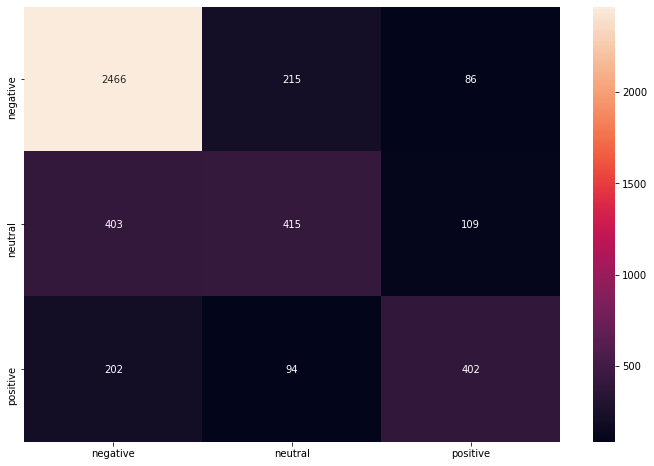

In [45]:
cv_result_full = cv_forest_full.predict(cv_X_test_full)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cv_conf_mat_full = confusion_matrix(cv_y_test_full, cv_result_full)

columns = ["negative", "neutral", "positive"]
df_cm = pd.DataFrame(cv_conf_mat_full, index = [i for i in columns], columns = [i for i in columns])

plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, fmt='g')

In [46]:
time_count_vectorization_full = end_timer('count_vectorization_full')

count_vectorization_full time: 323.29976177215576 seconds 



<font size="5">Vectorization limiting the features</font>

In [47]:
start_timer('count_vectorization_limited')

In [48]:
#from sklearn.feature_extraction.text import CountVectorizer

cv_vectorizer_limited = CountVectorizer(max_features=2000)
cv_features_limited = cv_vectorizer_limited.fit_transform(tweets_text['text'])

cv_features_limited = cv_features_limited.toarray()   

In [49]:
cv_features_limited.shape

(14640, 2000)

In [50]:
#from sklearn.model_selection import train_test_split

cv_X_train_limited, cv_X_test_limited, cv_y_train_limited, cv_y_test_limited = train_test_split(cv_features_limited, tweets_text.airline_sentiment, test_size=0.3, random_state=13)

In [51]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

cv_forest_limited = RandomForestClassifier(n_estimators=10, n_jobs=4)

cv_forest_limited = cv_forest_limited.fit(cv_X_train_limited, cv_y_train_limited)

print(cv_forest_limited)
mean_count_vectorization_limited = np.mean(cross_val_score(cv_forest_limited, cv_features_limited, tweets_text.airline_sentiment, cv=10))
print(mean_count_vectorization_limited)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7368169398907104


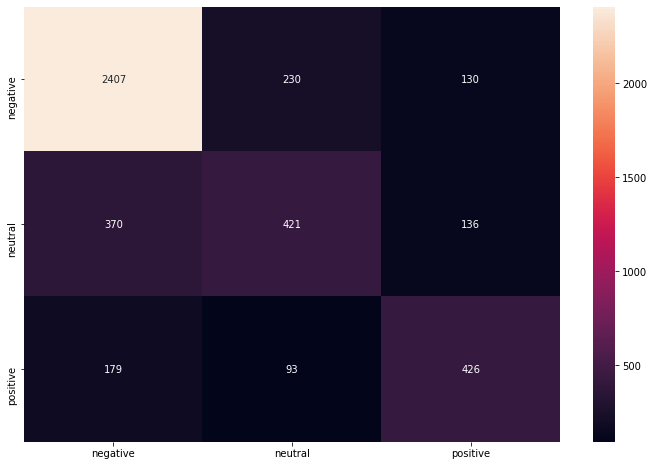

In [52]:
cv_result_limited = cv_forest_limited.predict(cv_X_test_limited)

#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics import confusion_matrix

cv_conf_mat_limited = confusion_matrix(cv_y_test_limited, cv_result_limited)

df_cm = pd.DataFrame(cv_conf_mat_limited, index = [i for i in columns], columns = [i for i in columns])

plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, fmt='g')

In [53]:
time_count_vectorization_limited = end_timer('count_vectorization_limited')

count_vectorization_limited time: 55.85350298881531 seconds 



#TfidfVectorizer model evaluation

<font size="5">Vectorization without limiting the features</font>

In [54]:
start_timer('Tfidf_vectorization_full')

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer_full = TfidfVectorizer()
tf_features_full = tf_vectorizer_full.fit_transform(tweets_text['text'])

tf_features_full = tf_features_full.toarray()

tf_features_full.shape

(14640, 14858)

In [56]:
#from sklearn.model_selection import train_test_split

tf_X_train_full, tf_X_test_full, tf_y_train_full, tf_y_test_full = train_test_split(tf_features_full, tweets_text.airline_sentiment, test_size=0.3, random_state=13)

In [57]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

import numpy as np

tf_forest_full = RandomForestClassifier(n_estimators=10, n_jobs=4)

tf_forest_full = tf_forest_full.fit(tf_X_train_full, tf_y_train_full)

print(tf_forest_full)
mean_Tfidf_vectorization_full = np.mean(cross_val_score(tf_forest_full, tf_features_full, tweets_text.airline_sentiment, cv=10))
print(mean_Tfidf_vectorization_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7361338797814208


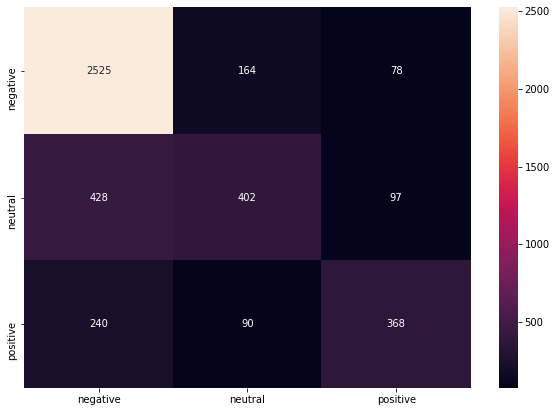

In [58]:
tf_result_full = tf_forest_full.predict(tf_X_test_full)

#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics import confusion_matrix

tf_conf_mat_full = confusion_matrix(tf_y_test_full, tf_result_full)

df_cm = pd.DataFrame(tf_conf_mat_full, index = [i for i in columns], columns = [i for i in columns])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [59]:
time_Tfidf_vectorization_full = end_timer('Tfidf_vectorization_full')

Tfidf_vectorization_full time: 342.12417340278625 seconds 



<font size="5">Vectorization limiting the features</font>

In [64]:
start_timer('Tfidf_vectorization_limited')

In [65]:
#from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer_limited = TfidfVectorizer(max_features=2000)
tf_features_limited = tf_vectorizer_limited.fit_transform(tweets_text['text'])

tf_features_limited = tf_features_limited.toarray()

tf_features_limited.shape

(14640, 2000)

In [66]:
#from sklearn.model_selection import train_test_split

tf_X_train_limited, tf_X_test_limited, tf_y_train_limited, tf_y_test_limited = train_test_split(tf_features_limited, tweets_text.airline_sentiment, test_size=0.3, random_state=13)

In [67]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

import numpy as np

tf_forest_limited = RandomForestClassifier(n_estimators=10, n_jobs=4)

tf_forest_limited = tf_forest_limited.fit(tf_X_train_limited, tf_y_train_limited)

print(tf_forest_limited)
mean_Tfidf_vectorization_limited = np.mean(cross_val_score(tf_forest_limited, tf_features_limited, tweets_text.airline_sentiment, cv=10))
print(mean_Tfidf_vectorization_limited)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7426912568306011


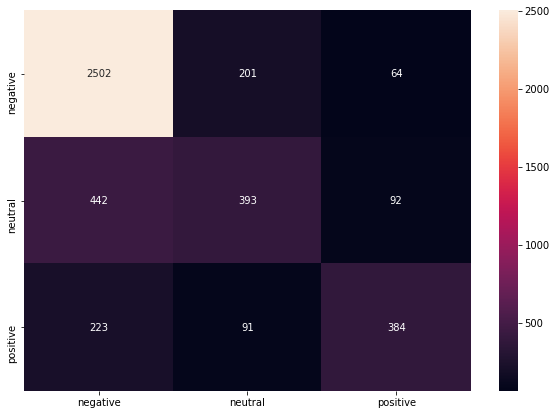

In [68]:
tf_result_limited = tf_forest_limited.predict(tf_X_test_limited)

#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.metrics import confusion_matrix

tf_conf_mat_limited = confusion_matrix(tf_y_test_limited, tf_result_limited)

df_cm = pd.DataFrame(tf_conf_mat_limited, index = [i for i in columns], columns = [i for i in columns])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [69]:
time_Tfidf_vectorization_limited = end_timer('Tfidf_vectorization_limited')

Tfidf_vectorization_limited time: 61.59297490119934 seconds 



#Conclusion

In [72]:
print("Pre-processing time: %s seconds" % time_pre_processing)
print("")
print("CountVectorizer time without limit: %s seconds" % time_count_vectorization_full)
print("CountVectorizer score without limit: %s" % mean_count_vectorization_full)
print("")
print("CountVectorizer time with 2000 limit: %s seconds" % time_count_vectorization_limited)
print("CountVectorizer score with 2000 limit:%s" % mean_count_vectorization_limited)
print("")
print("TfidfVectorizer time without limit: %s seconds" % time_Tfidf_vectorization_full)
print("TfidfVectorizer score without limit: %s" % mean_Tfidf_vectorization_full)
print("")
print("TfidfVectorizer time with 2000 limit: %s seconds" % time_Tfidf_vectorization_limited)
print("TfidfVectorizer score with 2000 limit: %s" % mean_Tfidf_vectorization_limited)

Pre-processing time: 152.8591763973236 seconds

CountVectorizer time without limit: 323.29976177215576 seconds
CountVectorizer score without limit: 0.7379098360655737

CountVectorizer time with 2000 limit: 55.85350298881531 seconds
CountVectorizer score with 2000 limit:0.7368169398907104

TfidfVectorizer time without limit: 342.12417340278625 seconds
TfidfVectorizer score without limit: 0.7361338797814208

TfidfVectorizer time with 2000 limit: 61.59297490119934 seconds
TfidfVectorizer score with 2000 limit: 0.7426912568306011


<font size="5">Pre-processing</font>
<br>
<br>

<font size="4">I had to try a few times, because of the order needed to get a good result.
The symbols removal had to be done in the stopwords list too, because the tokens in the execution time don't had any symbol, and the stopword were not matching without the cleaning</font>

---
<font size="4">Another point was to remove the first token, that in this case was the company name, because I didn't want my model being affected by this information</font>

---
<font size="4">Because of my experience in software development, I already had knowledge of Regex and Html encoding / tags, so it was quite linear for me the process to clear this kind of noise</font>

---
<font size="4">The most expencive was the Lemmatization, that took 147 seconds, but the results were better in my perspective than Stemming. The Stemming try runned in only 2.9 seconds, but many words were broken. Funny enough, the word "need" was broken in the Lemmatization and not in Stemming.</font>
<br>
<br>

<font size="5">Vectorization and model evaluation</font>
<br>
<br>

<font size="4">The CountVectorizer and the TfidfVectorizer were executed in a similar time, beeing the first a little faster</font>

---
<font size="4">The CountVectorizer had a little advantage evaluation of neutral 
and negative sentiments</font>

---
<font size="4">The TfidfVectorizer had a little advantage evaluation of positive sentiments</font>

---
<font size="4">Both vectorizers had almost no change in the score between unlimited features (14858), and the limit of "2000"</font>

---
<font size="4">TfidfVectorizer had a questionable advantage in the score</font>